In [1]:
wd <- dirname(dirname(getwd()))
source(paste0(wd,"/mission_control/treasure_map.R"))
source(paste0(wd,"/mission_control/helpers/figures/figure5_themes.R"))

library(tidyverse)
library(gridExtra)
library(ggpubr)

Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
── Attaching packages ──────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 1.2.1 ──
✔ tibble  3.1.2     ✔ purrr   0.3.4
✔ tidyr   1.1.3     ✔ dplyr   1.0.6
✔ readr   1.3.1     ✔ stringr 1.4.0
✔ tibble  3.1.2     ✔ forcats 0.5.1
Warning message:
“package ‘tibble’ was built under R version 3.6.3”Warning message:
“package ‘tidyr’ was built under R version 3.6.3”Warning message:
“package ‘purrr’ was built under R version 3.6.3”Warning message:
“package ‘dplyr’ was built under R version 3.6.3”Warning message:
“package ‘forcats’ was built under R version 3.6.3”── Conflicts ─────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Attaching package: ‘gridExtra’

The following object is ma

#### 0 - Read Subplots

In [2]:
b <- readRDS(paste0(FIG_DIR, "figure5_b.Rds"))
c <- readRDS(paste0(FIG_DIR, "figure5_c.Rds"))
d <- readRDS(paste0(FIG_DIR, "figure5_d.Rds"))

#### get dressed

In [3]:
get_dressed <- function(go, hjust = .5, size = 25, vjust = 4, m = 1){
    go + theme(plot.title = element_text(hjust = hjust, size = size, vjust = vjust), plot.margin = unit(rep(m,4), "cm"))
}
annote <- function( i, lab ) annotate_figure( i, fig.lab = lab, fig.lab.size = 35, fig.lab.face = "bold")
left_title <- theme(plot.title = element_text(hjust = 0))

In [4]:
fig_b <- annote(get_dressed(as_ggplot(b$abc) + ggtitle("Patients Stratified by Response Groups"), size = 35), "B")
fig_c <- annote(get_dressed( as_ggplot(c$response) , size = 35) + ggtitle("Surivival by Response Groups"), "C")
fig_d <- annote(get_dressed( d , size = 35) + ggtitle("Patients Stratified by TMB High or Low (TMB per MB > 10)"), "D")

### 2 - Middle Panel

In [5]:
layout <- cbind(c(rep(1,5), rep(2,4)), c(rep(1,5), rep(2,4)), c(rep(3,5), rep(4,4)), c(rep(3,5), rep(4,4)), c(rep(3,5), rep(4,4)))

In [6]:
go <- as_ggplot(arrangeGrob(ggplot() + geom_blank(), fig_c, fig_b, fig_d, layout_matrix = layout))

In [7]:
go_go <- (get_dressed(go, m = 1, size = 40, vjust = 2) )

### 3 - Bottom panel

In [9]:
paste0(FIG_FINAL_DIR, "figure5_new.png")

[1] "/workspace/projects/immune_biomarkers/final_figures/figure5_new.png"

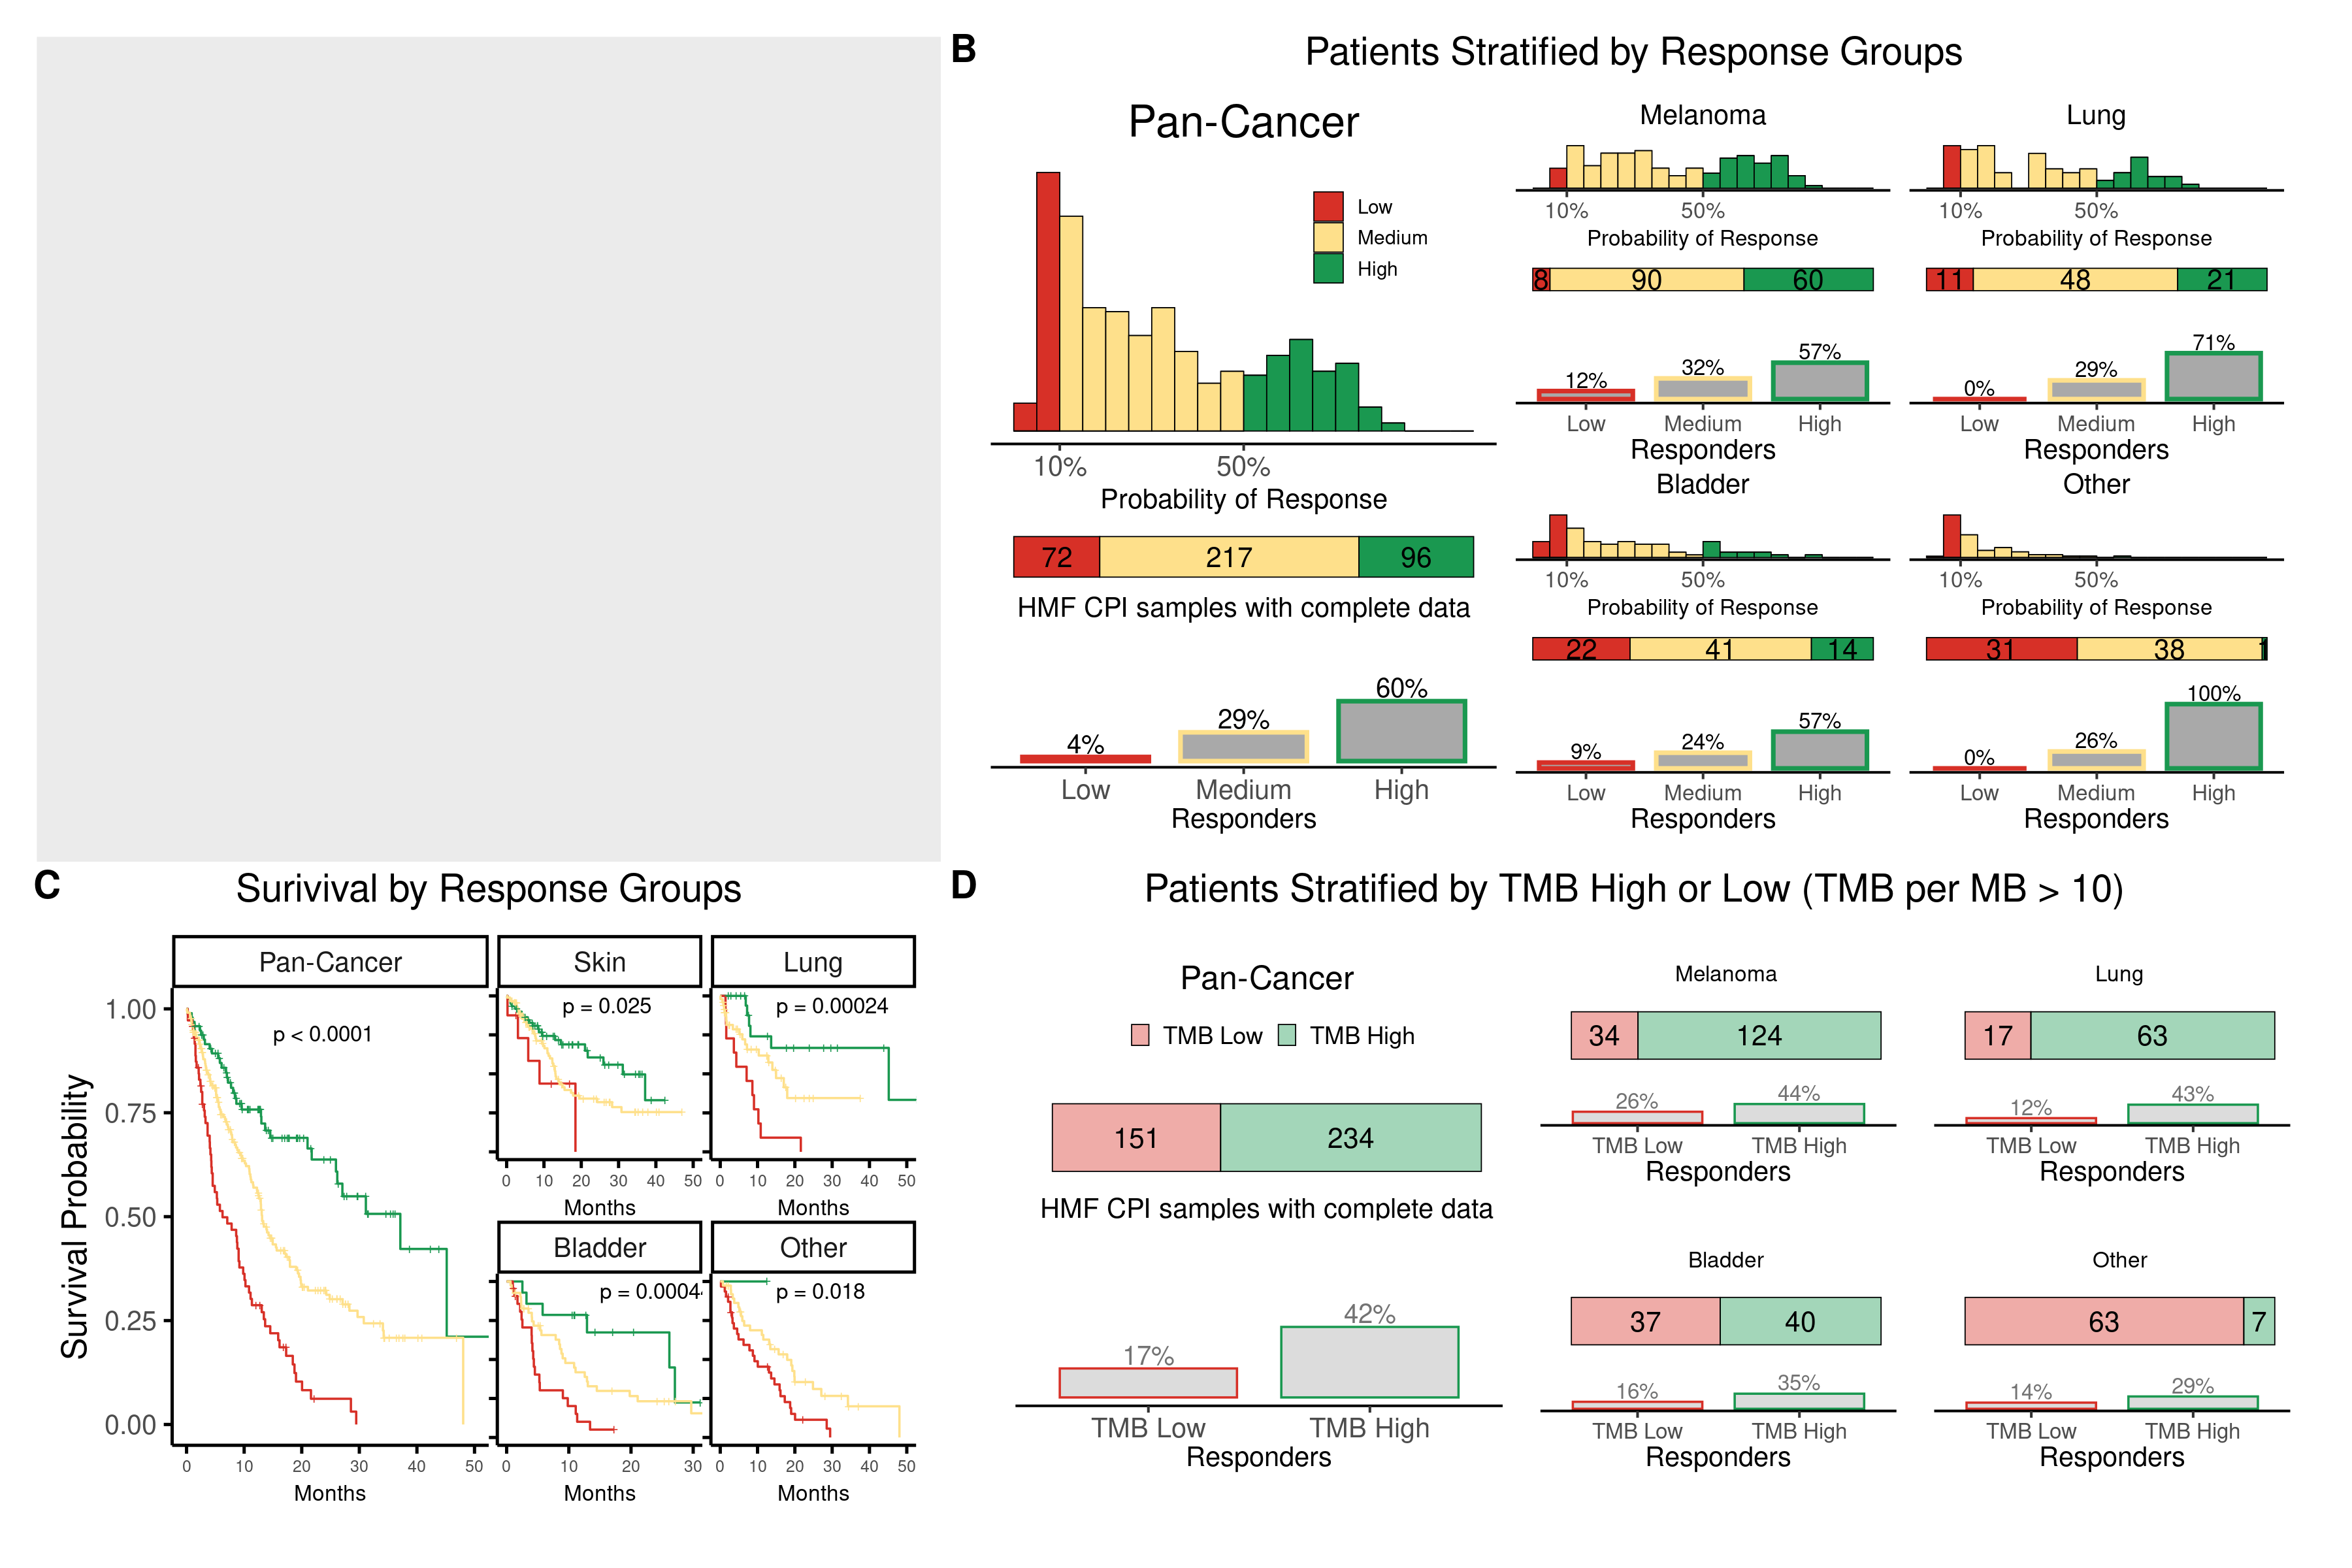

In [10]:
options(repr.plot.width = 30, repr.plot.height= 20, resolution = 200)
go_go
ggsave(file = paste0(FIG_FINAL_DIR, "figure5_new.png"), width = 30, height = 20)
ggsave(file = paste0(FIG_FINAL_DIR, "figure5_new.pdf"), width = 30, height = 20)